# Column Name Description

- age -  Age of the person in years
- sex  - Gender (0 = Female, 1 = Male)
- cp - Chest pain type (0 to 3, where 3 = most severe)
- trestbps - Resting blood pressure (in mm Hg)
- chol - Serum cholesterol (in mg/dl)
- fbs - Fasting blood sugar > 120 mg/dl (1 = Yes, 0 = No)
- restecg - Resting electrocardiographic results (0 to 2)
- thalach - Maximum heart rate achieved
- exang - Exercise induced angina (1 = Yes, 0 = No)
- oldpeak - ST depression caused by exercise compared to rest
- slope - Slope of the peak exercise ST segment (0 to 2)
- ca - Number of major vessels colored by fluoroscopy (0 to 3)
- thal - Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)
- target - Heart disease presence (1 = Yes, 0 = No)

      

# Hypotheses

- Older people tend to have higher cholesterol levels, which increases the risk of heart disease.[Scatter plot with regression line (age vs.cholesterol)]
- People with severe chest pain (cp=3) and low max heart rate (thalach) are more likely to have heart disease.[Clustered bar plot]
- Males are more likely to experience chest pain during exercise (exang=1) compared to females.[stacked bar plot]
- People with high oldpeak and flat slope are more likely to have heart disease.[Grouped bar]
- People with high blood pressure and blocked vessels (ca > 0) are at greater risk.[Heatmap of average disease rate]
- People with high sugar (fbs=1) and high cholesterol are more likely to have heart disease.[ Bar plot grouped by sugar level & cholesterol bands]
- ECG abnormal + thal defect = strong heart disease chance.[Grouped bar plot]
- Low heart rate and exercise pain leads to higher disease.[Bar plot by heart rate level and exang]
- People with cp=3 mostly have heart disease.[ Pie chart]
- Older people usually have lower max heart rate.[Lineplot (age vs thalach)]
- Males have a higher heart disease percentage than females.[bar plot by sex]

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('heart-2.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [23]:
copy_df = df.copy()

In [6]:
copy_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
copy_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- As age increases, cholesterol level shows a slight increase.
- People with heart disease (orange) are spread across all ages but tend to have higher cholesterol.

# pairplot for all columns

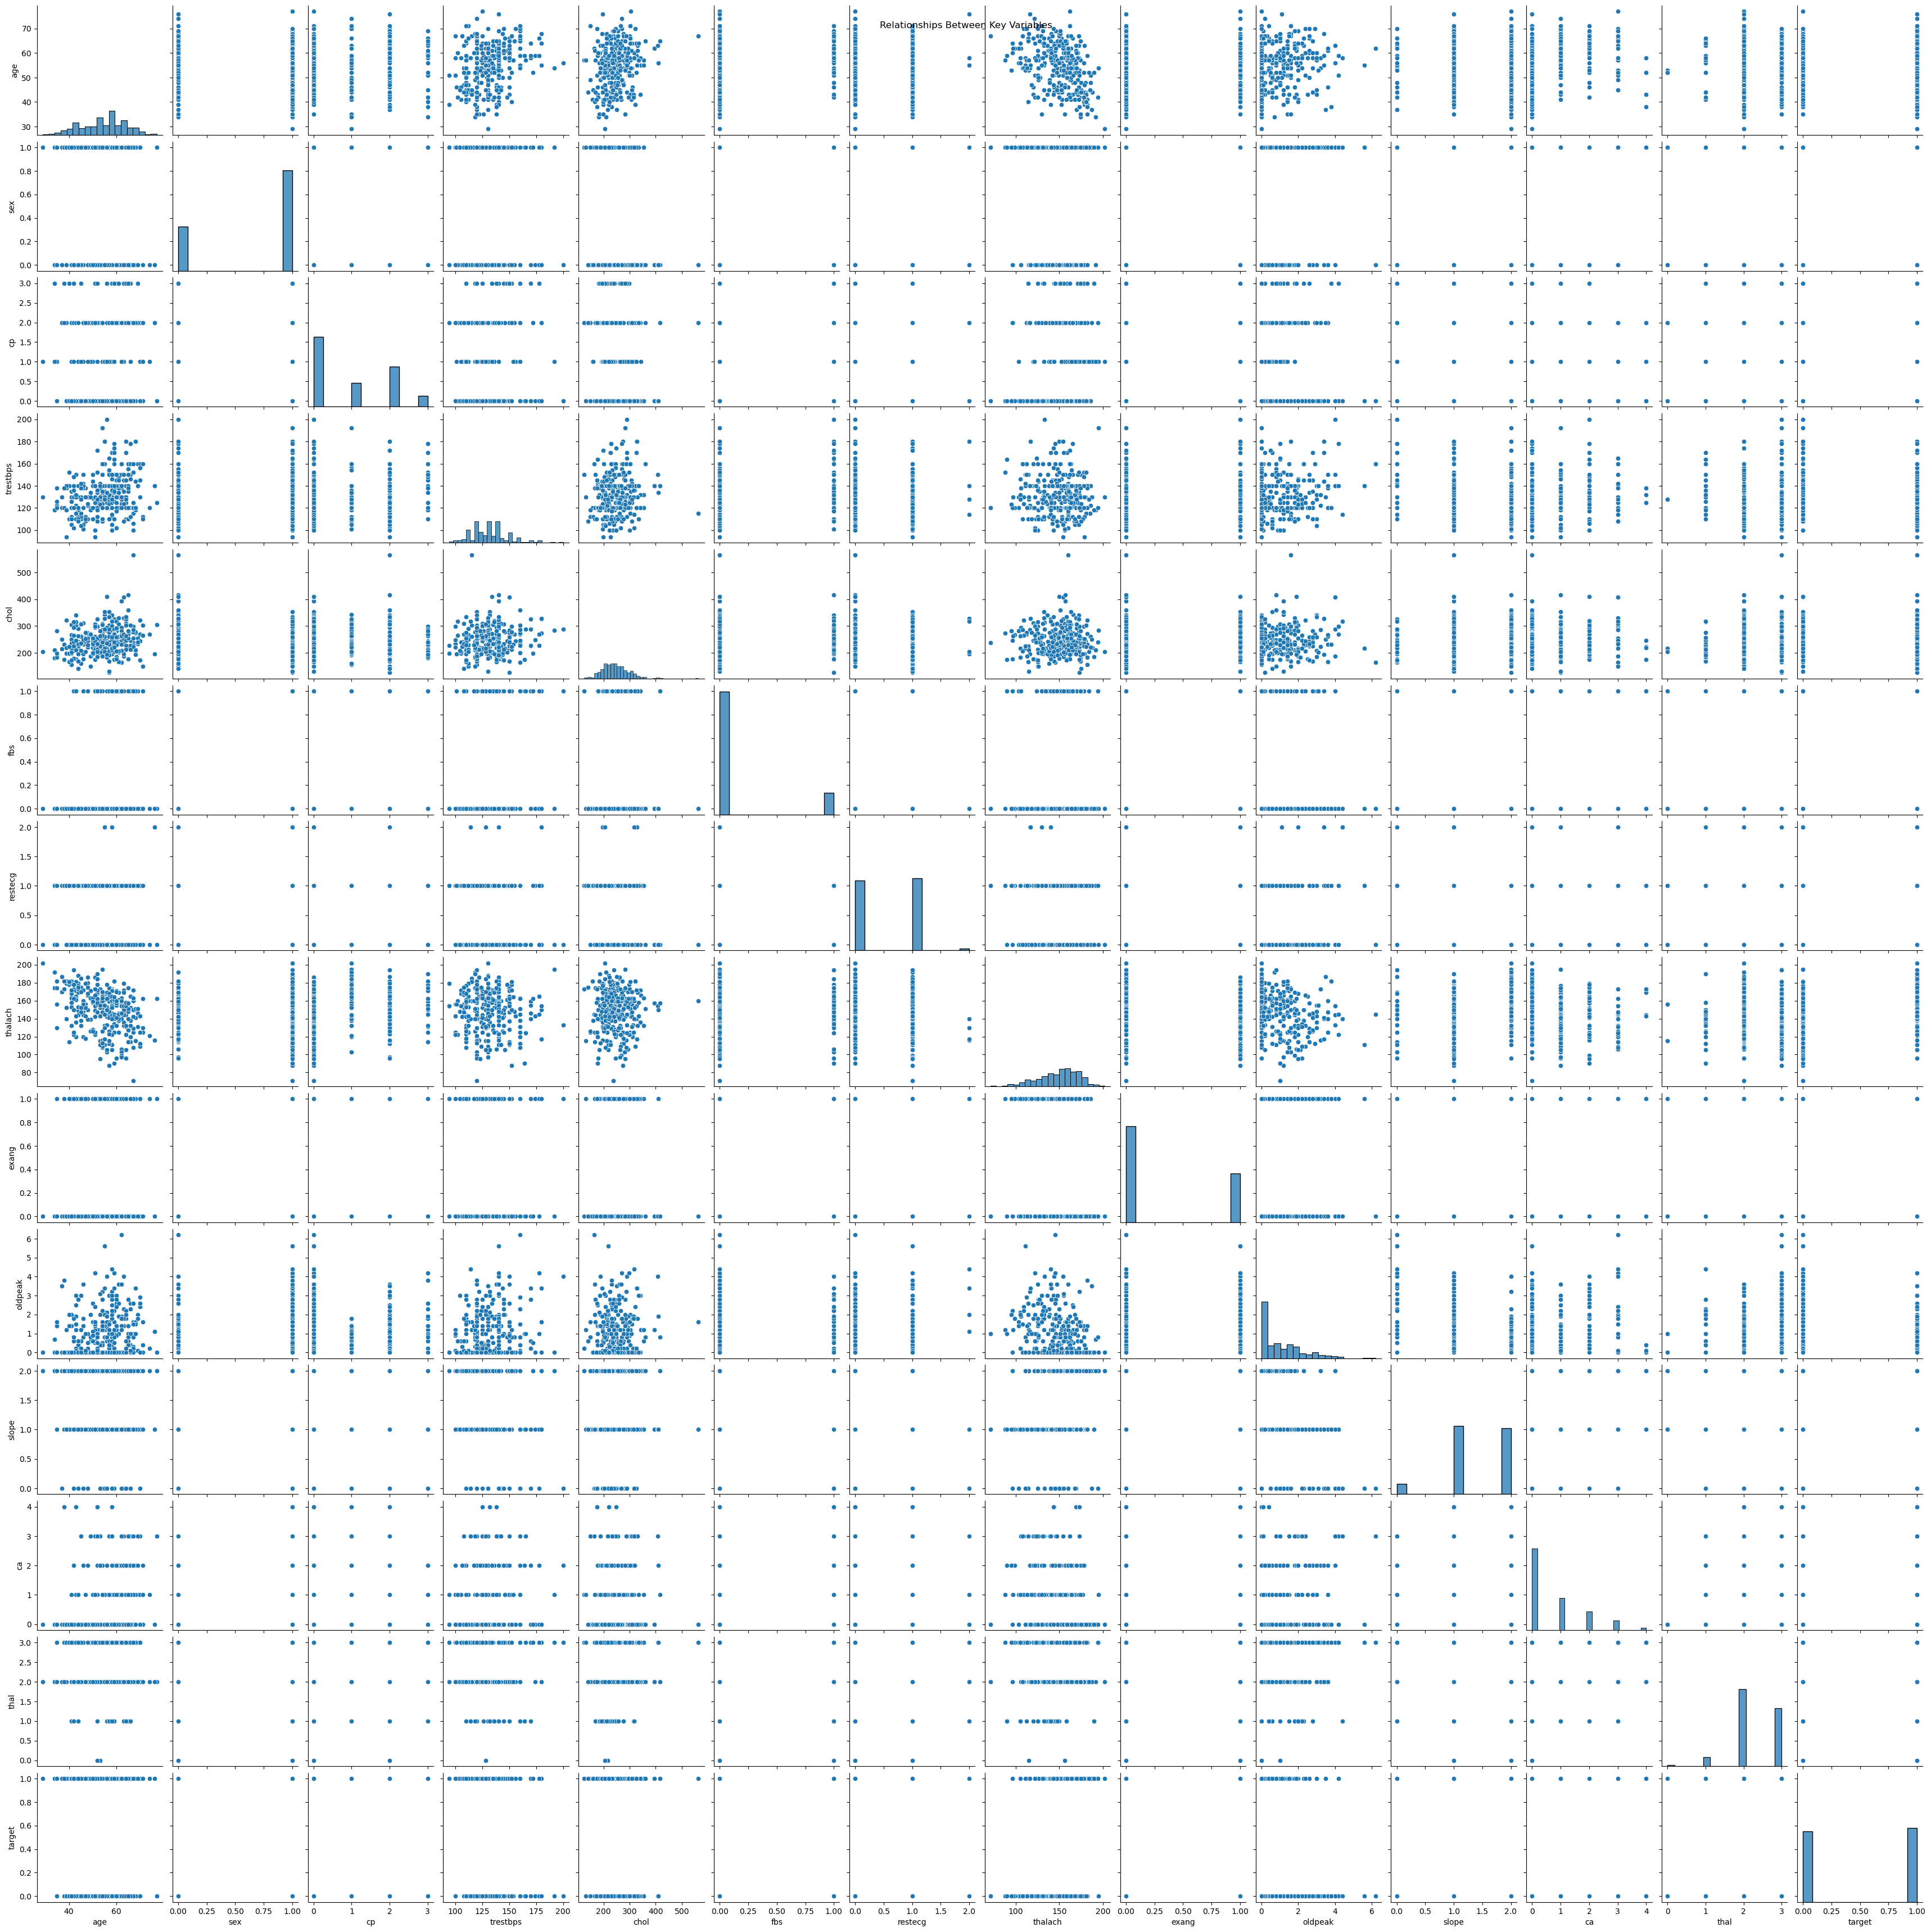

In [30]:
sns.pairplot(copy_df)
plt.suptitle("Relationships Between Key Variables")
plt.show()

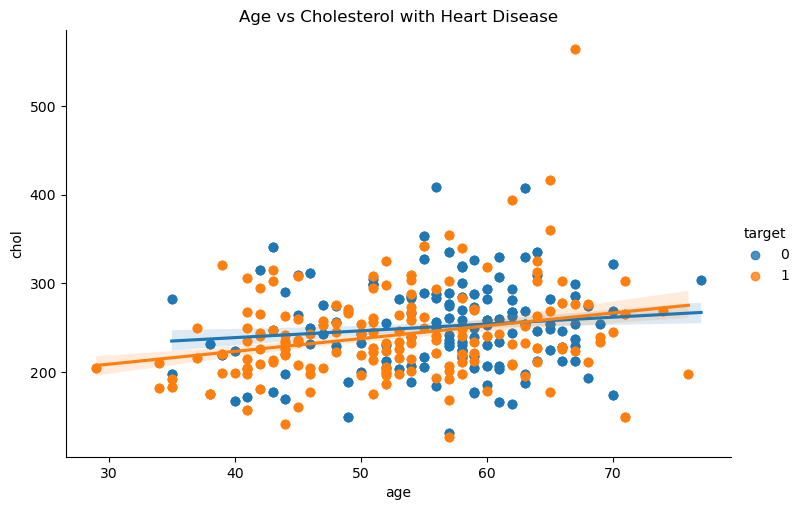

In [9]:
# Older people tend to have higher cholesterol levels, which increases the risk of heart disease.
sns.lmplot(data=copy_df, x='age', y='chol', hue='target', aspect=1.5)
plt.title('Age vs Cholesterol with Heart Disease')
plt.show()

- When chest pain is severe, people with low max heart rate have 100% chance of heart disease.
- Higher heart rate seems slightly protective, reducing the disease percentage.

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_6796\851995794.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = combo.groupby(['thalach_level', 'target']).size().unstack().fillna(0)


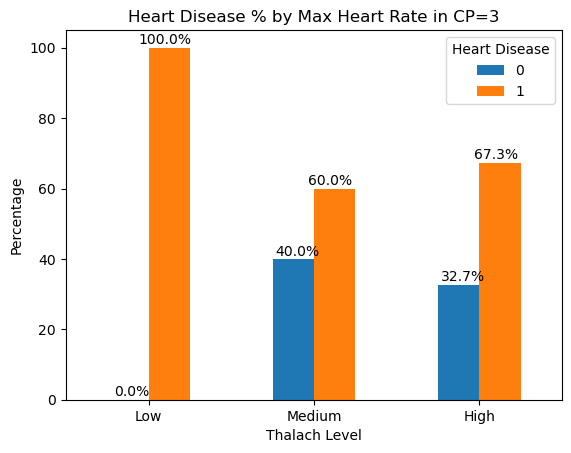

In [10]:
# People with severe chest pain (cp=3) and low max heart rate (thalach) are more likely to have heart disease.
copy_df['thalach_level'] = pd.cut(copy_df['thalach'], bins=[0,120,150,200], labels=['Low','Medium','High'])

combo = copy_df[(copy_df['cp'] == 3)]
plot_df = combo.groupby(['thalach_level', 'target']).size().unstack().fillna(0)
plot_df = plot_df.div(plot_df.sum(axis=1), axis=0) * 100
plot_df.plot(kind='bar', stacked=False)

for i, col in enumerate(plot_df.columns):
    for j, val in enumerate(plot_df[col]):
        plt.text(j + (i-0.5)*0.2, val + 1, f'{val:.1f}%', ha='center')

plt.title('Heart Disease % by Max Heart Rate in CP=3')
plt.ylabel('Percentage')
plt.xlabel('Thalach Level')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.show()

- 38% of males feel chest pain during exercise vs only 24% of females.
- So, men are more affected by exercise-induced angina.

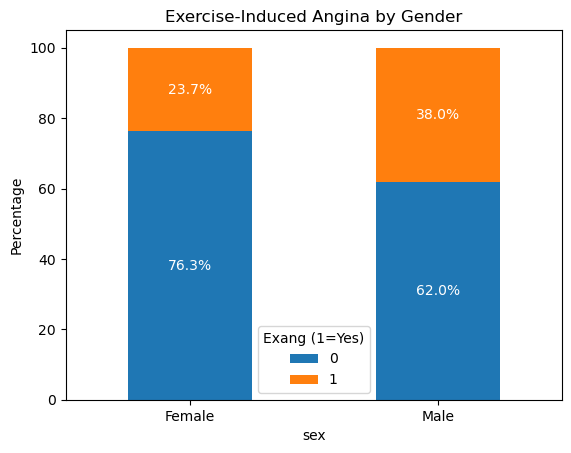

In [11]:
# Males are more likely to experience chest pain during exercise (exang=1) compared to females.
gender_exang = copy_df.groupby(['sex', 'exang']).size().unstack()
gender_exang = gender_exang.div(gender_exang.sum(axis=1), axis=0) * 100
gender_exang.plot(kind='bar', stacked=True)

for i, row in gender_exang.iterrows():
    total = 0
    for j, val in enumerate(row):
        plt.text(i, total + val/2, f'{val:.1f}%', ha='center', va='center', color='white')
        total += val

plt.xticks([0,1], ['Female','Male'], rotation=0)
plt.ylabel('Percentage')
plt.title('Exercise-Induced Angina by Gender')
plt.legend(title='Exang (1=Yes)')
plt.show()

- When slope is flat, people with low Oldpeak have almost equal chance of disease.
- But as Oldpeak increases, disease chance drops — possibly due to better heart recovery.

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_6796\4150473458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['oldpeak_level'] = pd.cut(subset['oldpeak'], bins=[-1,1,2,5], labels=['Low','Medium','High'])
C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_6796\4150473458.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = subset.groupby(['oldpeak_level', 'target']).size().unstack().fillna(0)


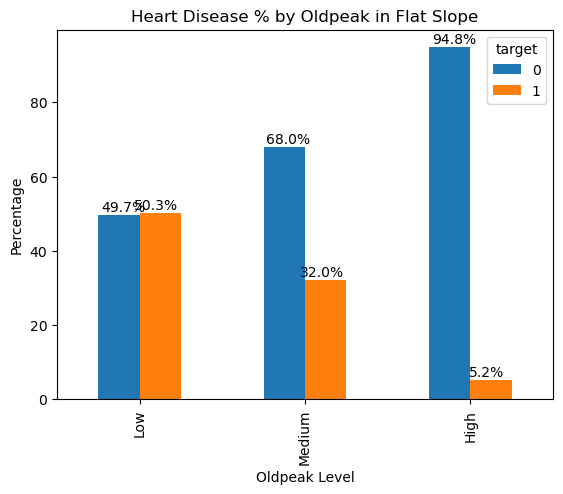

In [12]:
# People with high oldpeak and flat slope are more likely to have heart disease.
subset = copy_df[copy_df['slope'] == 1]  # flat
subset['oldpeak_level'] = pd.cut(subset['oldpeak'], bins=[-1,1,2,5], labels=['Low','Medium','High'])

plot_df = subset.groupby(['oldpeak_level', 'target']).size().unstack().fillna(0)
plot_df = plot_df.div(plot_df.sum(axis=1), axis=0) * 100
plot_df.plot(kind='bar')

for i, col in enumerate(plot_df.columns):
    for j, val in enumerate(plot_df[col]):
        plt.text(j + (i-0.5)*0.2, val + 1, f'{val:.1f}%', ha='center')

plt.title('Heart Disease % by Oldpeak in Flat Slope')
plt.ylabel('Percentage')
plt.xlabel('Oldpeak Level')
plt.show()


- Heart disease chance is higher when blood pressure is low or normal but vessels are blocked.
- Strangely, high BP + high blockage shows less disease—may need deeper analysis.

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_6796\3015903239.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_data = copy_df.pivot_table(values='target', index='bp_level', columns='ca_cat', aggfunc='mean')


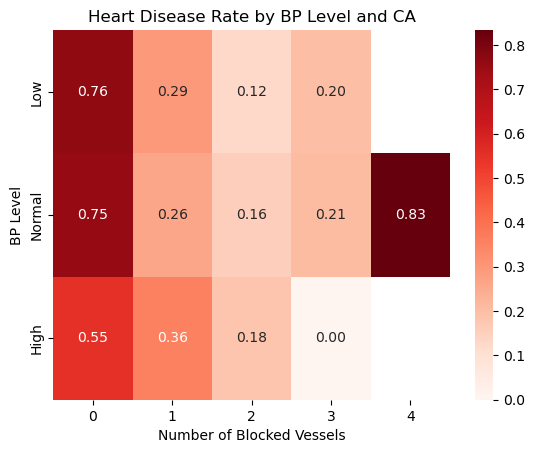

In [13]:
#  People with high blood pressure and blocked vessels (ca > 0) are at greater risk.
copy_df['bp_level'] = pd.cut(copy_df['trestbps'], bins=[0, 120, 140, 200], labels=['Low', 'Normal', 'High'])
copy_df['ca_cat'] = copy_df['ca'].astype(str)

heat_data = copy_df.pivot_table(values='target', index='bp_level', columns='ca_cat', aggfunc='mean')
sns.heatmap(heat_data, annot=True, cmap='Reds', fmt='.2f')

plt.title('Heart Disease Rate by BP Level and CA')
plt.xlabel('Number of Blocked Vessels')
plt.ylabel('BP Level')
plt.show()

- People with high sugar and normal cholesterol had the highest disease % (71.4%).
- Surprisingly, high cholesterol showed slightly less risk in these cases.

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_6796\1905780182.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = copy_df[copy_df['fbs'] == 1].groupby(['chol_level', 'target']).size().unstack().fillna(0)


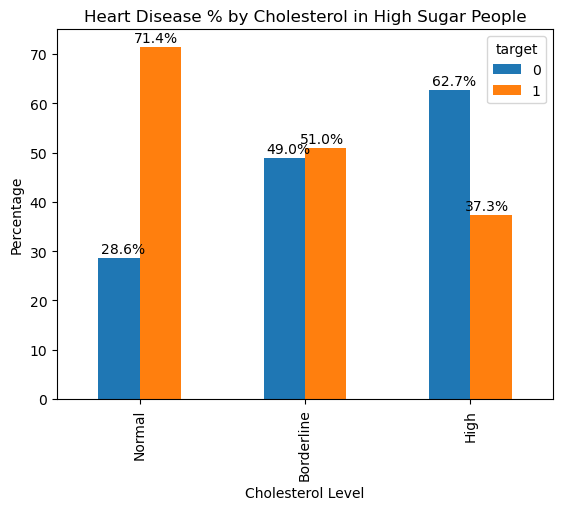

In [14]:
#People with high sugar (fbs=1) and high cholesterol are more likely to have heart disease.
copy_df['chol_level'] = pd.cut(copy_df['chol'], bins=[0,200,240,600], labels=['Normal','Borderline','High'])

plot_df = copy_df[copy_df['fbs'] == 1].groupby(['chol_level', 'target']).size().unstack().fillna(0)
plot_df = plot_df.div(plot_df.sum(axis=1), axis=0) * 100
plot_df.plot(kind='bar')

for i, col in enumerate(plot_df.columns):
    for j, val in enumerate(plot_df[col]):
        plt.text(j + (i-0.5)*0.2, val + 1, f'{val:.1f}%', ha='center')

plt.title('Heart Disease % by Cholesterol in High Sugar People')
plt.ylabel('Percentage')
plt.xlabel('Cholesterol Level')
plt.show()

- People with RestECG=1 and Thal=2 (yellow) show highest disease percentage.
- That combo seems most risky compared to other ECG-Thal combinations.

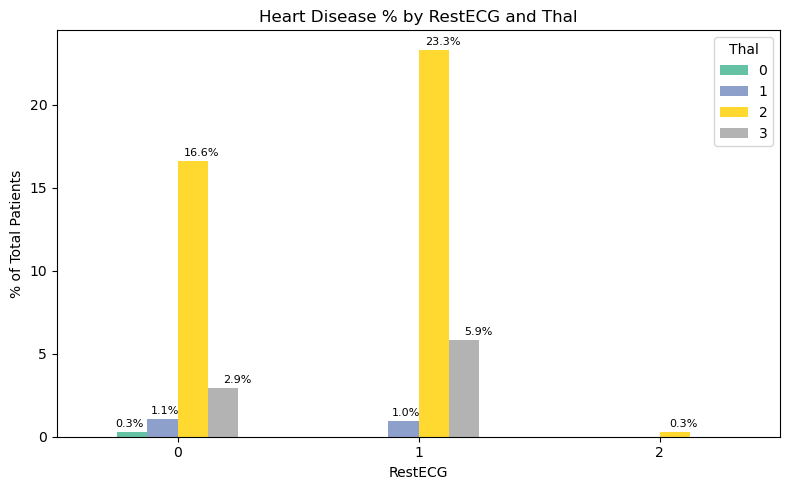

In [15]:
#ECG abnormal + thal defect = strong heart disease chance
df_grp = copy_df[copy_df['target'] == 1].groupby(['restecg', 'thal']).size().unstack().fillna(0)
df_grp = (df_grp / len(copy_df)) * 100


ax = df_grp.plot(kind='bar', figsize=(8,5), colormap='Set2')

for i in range(df_grp.shape[0]):
    for j in range(df_grp.shape[1]):
        val = df_grp.iloc[i, j]
        if val > 0:
            ax.text(i + j*0.15 - 0.2, val + 0.3, f'{val:.1f}%', ha='center', fontsize=8)

plt.title('Heart Disease % by RestECG and Thal')
plt.ylabel('% of Total Patients')
plt.xlabel('RestECG')
plt.xticks(rotation=0)
plt.legend(title='Thal')
plt.tight_layout()
plt.show()

- High heart rate helps reduce disease risk in people with exercise-induced chest pain.
- Low heart rate in these people shows 93% had no disease — very clear inverse trend.

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_6796\1688757925.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = copy_df[copy_df['exang'] == 1].groupby(['thalach_group', 'target']).size().unstack().fillna(0)


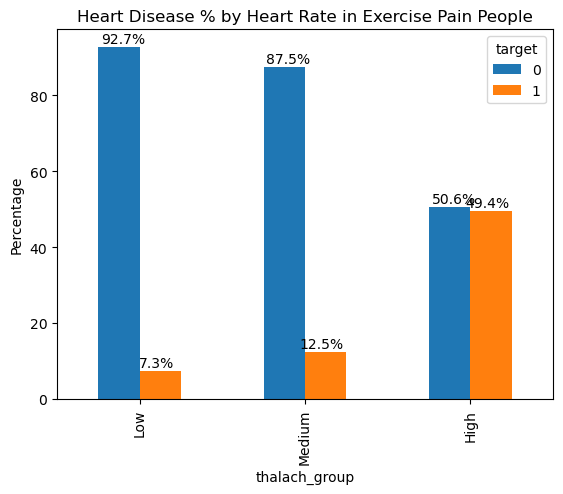

In [16]:
copy_df['thalach_group'] = pd.cut(copy_df['thalach'], bins=[50,120,150,200], labels=['Low','Medium','High'])

plot_df = copy_df[copy_df['exang'] == 1].groupby(['thalach_group', 'target']).size().unstack().fillna(0)
plot_df = plot_df.div(plot_df.sum(axis=1), axis=0) * 100
plot_df.plot(kind='bar')

for i, col in enumerate(plot_df.columns):
    for j, val in enumerate(plot_df[col]):
        plt.text(j + (i-0.5)*0.2, val + 1, f'{val:.1f}%', ha='center')

plt.title('Heart Disease % by Heart Rate in Exercise Pain People')
plt.ylabel('Percentage')
plt.show()

- Among people with severe chest pain (cp=3), only 34% had heart disease.
- Majority didn’t have disease — suggests cp alone isn't a strong indicator.

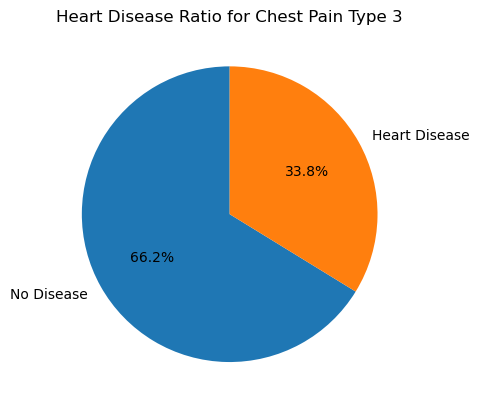

In [17]:
# People with cp=3 mostly have heart disease.
cp3 = copy_df[copy_df['cp'] == 3]['target'].value_counts(normalize=True) * 100
cp3.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['No Disease','Heart Disease'], legend=False)
plt.title('Heart Disease Ratio for Chest Pain Type 3')
plt.ylabel('')
plt.show()

- As age increases, maximum heart rate decreases consistently.
- This is a natural trend due to aging heart performance.

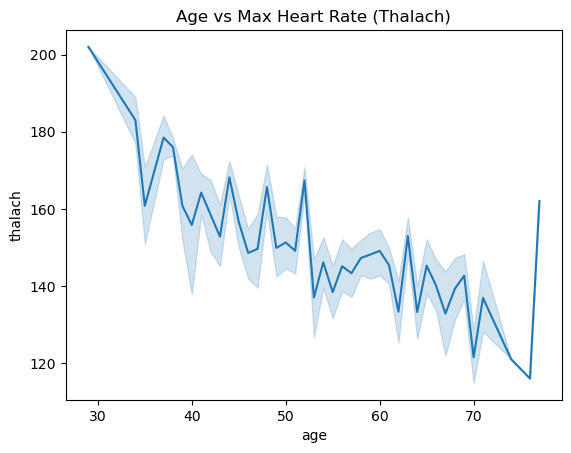

In [18]:
# Older people usually have lower max heart rate.
sns.lineplot(data=copy_df.sort_values('age'), x='age', y='thalach')
plt.title('Age vs Max Heart Rate (Thalach)')
plt.show()

- Men are more likely to have heart disease: The graph shows that 57.9% of men have heart disease, compared to only 27.6% of women, indicating a higher risk for males.
- Women without heart disease are the majority: 72.4% of women in the data are free from heart disease, while only 42.1% of men are in the same category, highlighting a significant gender difference.

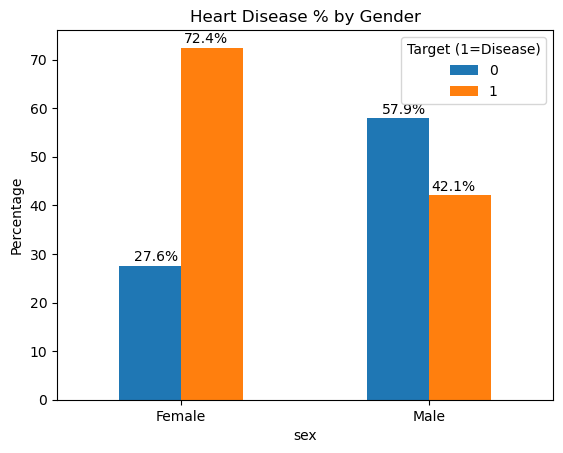

In [19]:
# Males have a higher heart disease percentage than females.
gender_disease = copy_df.groupby('sex')['target'].value_counts(normalize=True).unstack() * 100
gender_disease.plot(kind='bar')

for i in range(2):
    for j in range(2):
        val = gender_disease.iloc[i, j]
        plt.text(i + (j-0.5)*0.2, val + 1, f'{val:.1f}%', ha='center')

plt.xticks([0,1], ['Female','Male'], rotation=0)
plt.ylabel('Percentage')
plt.title('Heart Disease % by Gender')
plt.legend(title='Target (1=Disease)')
plt.show()

# Correlation Heatmap

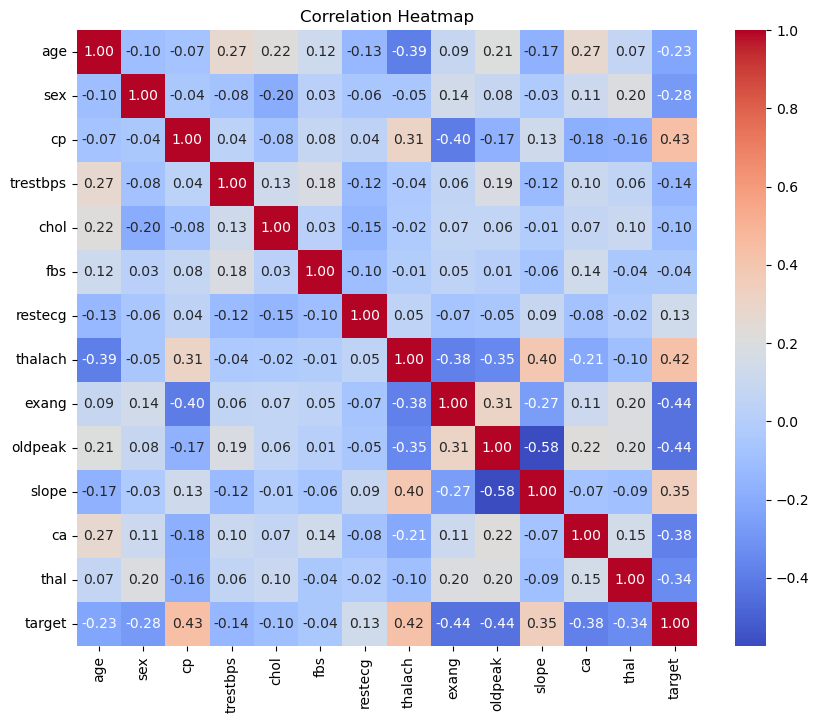

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(copy_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Data Insights

- Age has weak correlations: Age shows a slight positive link with some factors like trestbps (0.27) but a negative correlation with thalach (-0.39), suggesting older individuals may have higher resting blood pressure but lower max heart rate.

- Sex (gender) impact: Being male (sex=1) is negatively correlated with target (-0.28), aligning with the earlier graph showing men are more prone to heart disease.

- Chest pain (cp) matters: cp has a strong positive correlation with target (0.43), indicating chest pain is a key predictor of heart disease.

- Heart rate (thalach) is significant: Higher thalach (max heart rate) correlates positively with target (0.42), suggesting it’s linked to heart disease risk.

- Exercise-induced angina (exang) and ST depression (oldpeak): Both show strong negative correlations with target (-0.44 each), meaning their presence reduces the likelihood of heart disease.

- Weak predictors: Factors like fbs (fasting blood sugar) and restecg (resting ECG) have near-zero correlations with target, making them less useful for prediction.

- Contradictory trends: Slope (ST segment slope) has a positive correlation with target (0.35), while ca (vessels colored) and thal (thalassemia) are negatively linked (-0.38, -0.34), highlighting complex relationships.